In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
print(data.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']


In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}

for kernel in kernels:
    if kernel == 'linear':
        model = SVC(kernel=kernel, C=1.0, gamma='scale')
    elif kernel == 'poly':
        model = SVC(kernel=kernel, C=1.0, gamma='scale', degree=3)
    elif kernel == 'rbf':
        model = SVC(kernel=kernel, C=1.0, gamma='scale')
    elif kernel == 'sigmoid':
        model = SVC(kernel=kernel, C=1.0, gamma='scale')

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    svm_results[kernel] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1_score': f1, 'model': model, 'confusion_matrix': cm}

    print(f"\nKernel: {kernel}")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")



Kernel: linear
Confusion Matrix:
 [[54  0  0  0  0  0  0]
 [ 3 50  0  0  0  5  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  1 59  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  4  0  0  0 53  1]
 [ 0  0  0  0  0  2 56]]
Accuracy: 0.9551, Precision: 0.9554, Recall: 0.9551, F1-Score: 0.9549

Kernel: poly
Confusion Matrix:
 [[45  3  3  0  0  3  0]
 [12 29  9  0  0  5  3]
 [ 0  2 55  8  0  0  5]
 [ 0  0  6 53  0  0  1]
 [ 0  0  0  1 64  0  0]
 [ 1  8 25  0  0 22  2]
 [ 1  3 25  3  1  1 24]]
Accuracy: 0.6903, Precision: 0.7180, Recall: 0.6903, F1-Score: 0.6833

Kernel: rbf
Confusion Matrix:
 [[51  3  0  0  0  0  0]
 [ 5 38  2  0  0 11  2]
 [ 0  5 60  3  0  0  2]
 [ 0  4  2 54  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  8  3  0  0 39  8]
 [ 1  6  6  1  0  3 41]]
Accuracy: 0.8203, Precision: 0.8221, Recall: 0.8203, F1-Score: 0.8204

Kernel: sigmoid
Confusion Matrix:
 [[25 26  0  0  0  3  0]
 [16 23  0  0  0 14  5]
 [ 1  0 42 11  0  2 14]
 [ 1  0  3 56  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 5  7  4  0  0 31 11]
 [ 

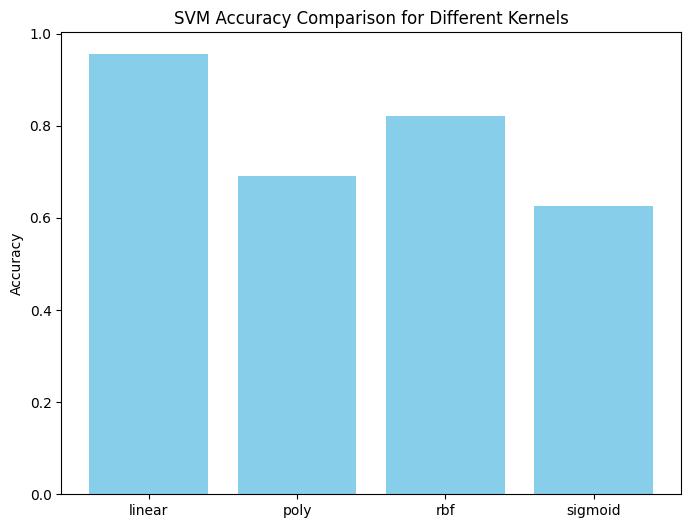

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(svm_results.keys(), [svm_results[k]['accuracy'] for k in kernels], color='skyblue')
plt.ylabel("Accuracy")
plt.title("SVM Accuracy Comparison for Different Kernels")
plt.show()


In [ ]:
cv_results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernels:
    model = svm_results[kernel]['model']
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    scores = cross_validate(model, X_train_scaled, y_train, cv=kf, scoring=scoring)

    cv_results[kernel] = {metric: np.mean(scores['test_' + metric]) for metric in scoring}


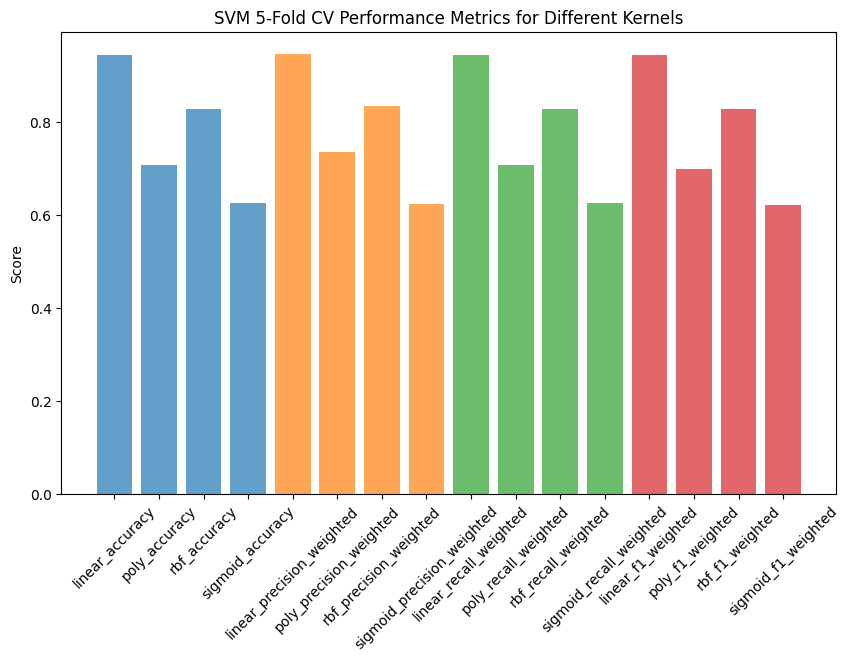

In [ ]:
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
plt.figure(figsize=(10,6))
for metric in metrics:
    plt.bar([k + '_' + metric for k in kernels], [cv_results[k][metric] for k in kernels], alpha=0.7)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.title("SVM 5-Fold CV Performance Metrics for Different Kernels")
plt.show()


In [ ]:
rbf_model = svm_results['rbf']['model']
support_vectors = rbf_model.support_vectors_
print("\nFirst 5 Support Vectors for RBF Kernel:\n", support_vectors[:5])



First 5 Support Vectors for RBF Kernel:
 [[-0.51797083 -1.93656174 -1.71045422  1.08020206 -2.17793762 -1.66053699
  -1.20444323 -1.08911463  1.01311923 -1.01311923  2.14661907 -2.14661907
  -0.36973009  0.36973009 -0.15973855  2.81624163 -2.29169192 -0.15378783
   0.1497019  -0.1497019   0.22010726 -0.22010726 -0.02434683 -0.18352205
   0.71403011 -0.66167924 -0.52433241 -0.05450583 -0.06453052  0.57643818
  -0.16549599]
 [-0.64742967 -1.02537014 -1.60826955  1.08020206  0.2653114  -1.66053699
  -0.29602349 -1.08911463  1.01311923 -1.01311923  2.14661907 -2.14661907
   2.70467575 -2.70467575 -0.15973855  2.81624163 -2.29169192 -0.15378783
   0.1497019  -0.1497019  -4.54323955  4.54323955 -0.02434683 -0.18352205
   0.71403011 -0.66167924 -0.52433241 -0.05450583 -0.06453052  0.57643818
  -0.16549599]
 [-0.79780655 -1.42534363 -1.71297411 -0.67547842 -2.17793762 -0.55623382
  -1.20444323  1.77318643  1.01311923 -1.01311923  2.14661907 -2.14661907
  -0.36973009  0.36973009 -0.15973855 -0